In [1]:
# NYC Taxi Trip 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
df=pd.read_csv('dataset/nyc_taxi_trip_duration.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df.shape

(729322, 11)

In [5]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [8]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [10]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [11]:
df['pickup_datetime']

0        2016-02-29 16:40:21
1        2016-03-11 23:35:37
2        2016-02-21 17:59:33
3        2016-01-05 09:44:31
4        2016-02-17 06:42:23
                 ...        
729317   2016-05-21 13:29:38
729318   2016-02-22 00:43:11
729319   2016-04-15 18:56:48
729320   2016-06-19 09:50:47
729321   2016-01-01 17:24:16
Name: pickup_datetime, Length: 729322, dtype: datetime64[ns]

In [12]:
df['passenger_count'].unique()

array([1, 2, 6, 3, 4, 5, 0, 7, 9], dtype=int64)

In [13]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


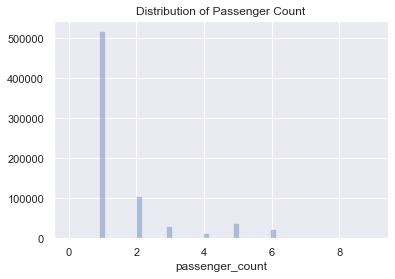

In [14]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In [15]:

print("pickup_datetime",df['pickup_datetime'].nunique())
print("dropoff_datetime",df['dropoff_datetime'].nunique())

pickup_datetime 709359
dropoff_datetime 709308


In [16]:
df['pickup_datetime']

0        2016-02-29 16:40:21
1        2016-03-11 23:35:37
2        2016-02-21 17:59:33
3        2016-01-05 09:44:31
4        2016-02-17 06:42:23
                 ...        
729317   2016-05-21 13:29:38
729318   2016-02-22 00:43:11
729319   2016-04-15 18:56:48
729320   2016-06-19 09:50:47
729321   2016-01-01 17:24:16
Name: pickup_datetime, Length: 729322, dtype: datetime64[ns]

In [17]:
# convert these dates into "days of the week" to find the pattern.
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [18]:
# pickup day wise count
df['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

In [19]:
# dropoff day wise count
df['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64

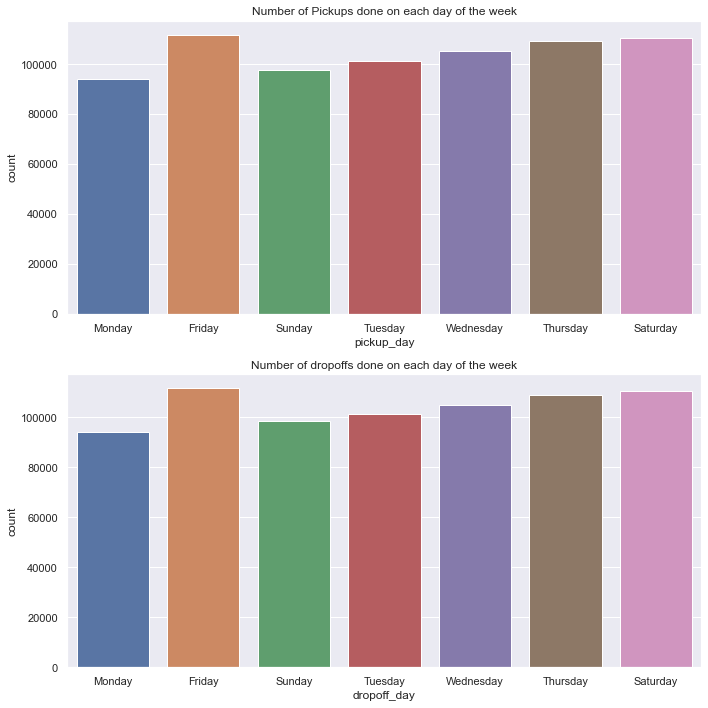

In [20]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [21]:
# divide the times into 4 time zones: 
# morning (4 hrs to 10 hrs) , 
# midday (10 hrs to 16 hrs) , 
# evening (16 hrs to 22 hrs) and
# late night (22 hrs to 4 hrs)


def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [22]:
df['pickup_timezone']

0            evening
1         late night
2            evening
3            morning
4            morning
             ...    
729317        midday
729318    late night
729319       evening
729320       morning
729321       evening
Name: pickup_timezone, Length: 729322, dtype: object

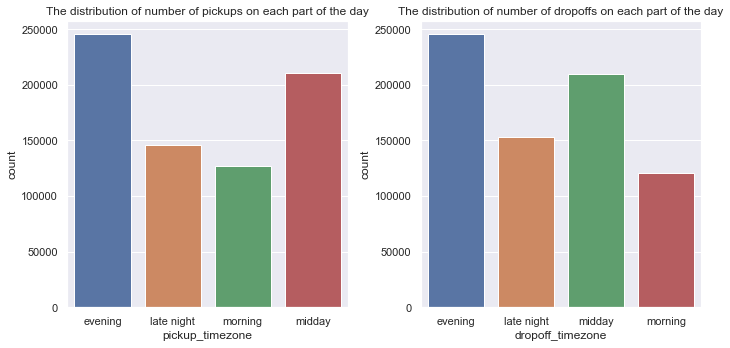

In [23]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

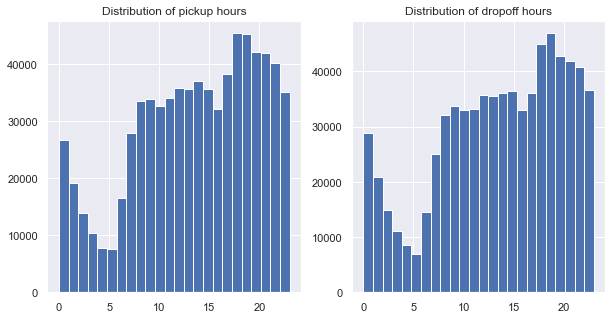

In [24]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

In [25]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [26]:
#Distribution of the trip duration
df['trip_duration']

0          400
1         1100
2         1635
3         1141
4          848
          ... 
729317     296
729318     315
729319     673
729320     447
729321    1224
Name: trip_duration, Length: 729322, dtype: int64

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

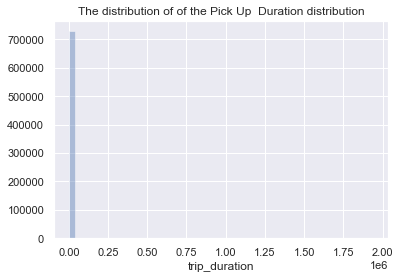

In [27]:
sns.distplot(df['trip_duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')


In [28]:
df['trip_duration'].describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

In [29]:
df['trip_duration'].max()

1939736

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

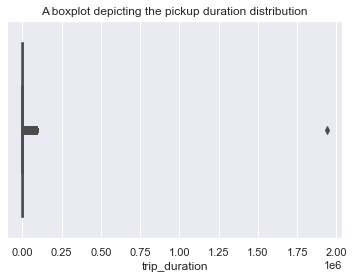

In [30]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

In [31]:
#10 largest value of trip_duration
print( df['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


In [32]:
# 10 smallest value of trip_duration
df['trip_duration'].unique()

array([  400,  1100,  1635, ..., 85962,  4944, 84188], dtype=int64)

In [33]:
df=df[df.trip_duration!=df.trip_duration.max()]

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

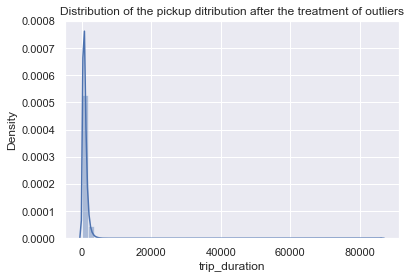

In [34]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

In [35]:
# Intervals are decided as follows:
# less than 5 hours  , 5–10 hours , 10–15 hours  , 15–20 hours  , more than 20 hours

bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [36]:
df['duration_time']

0         < 5
1         < 5
2         < 5
3         < 5
4         < 5
         ... 
729317    < 5
729318    < 5
729319    < 5
729320    < 5
729321    < 5
Name: duration_time, Length: 729321, dtype: category
Categories (5, object): ['< 5' < '5-10' < '10-15' < '15-20' < '>20']

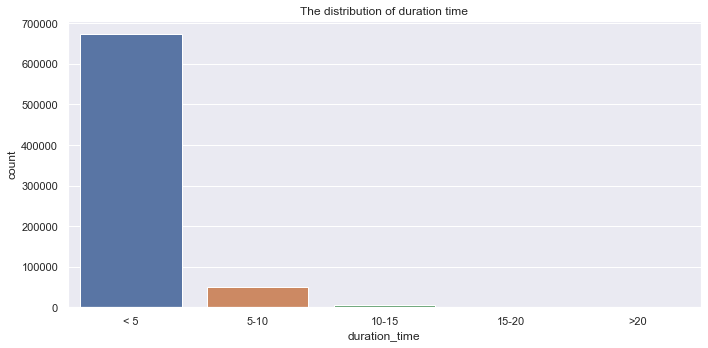

In [37]:
figure,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.countplot(x='duration_time',data=df,ax=ax)
ax.set_title('The distribution of duration time')
plt.tight_layout()

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of Pick up Longitude')

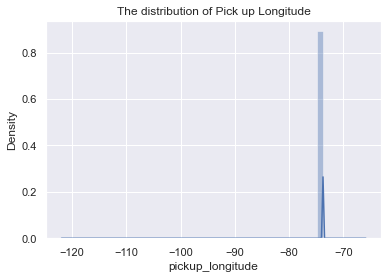

In [38]:
#Distribution of pickup longitude
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of Drop off Longitude')

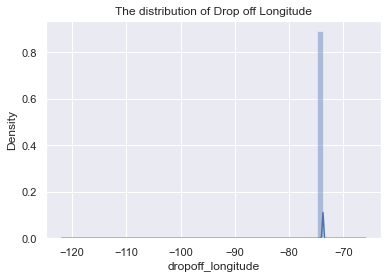

In [39]:
#Distribution of drop off longitude

sns.distplot(df['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of pick up Latitude')

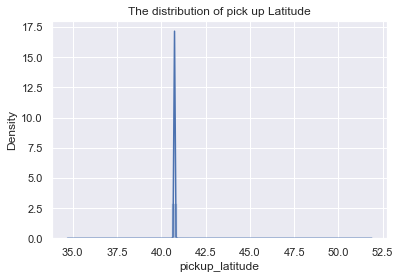

In [40]:
#Distribution of pickup latitude
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

<AxesSubplot:>

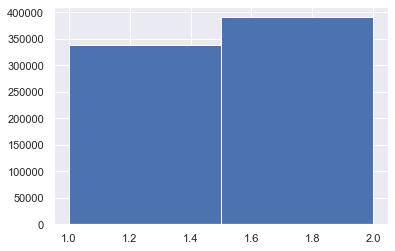

In [41]:
df['vendor_id'].hist(bins=2)

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

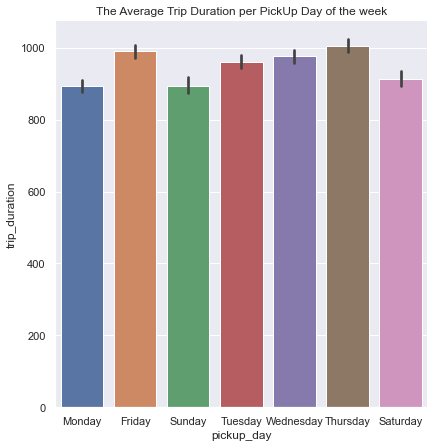

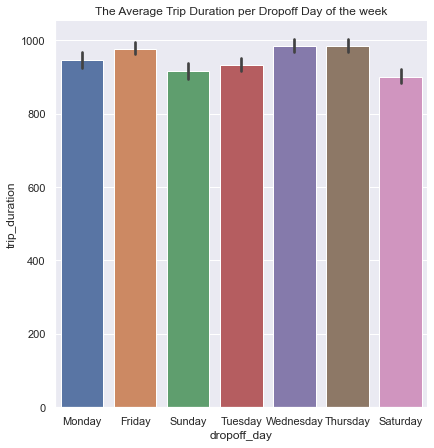

In [42]:
#relationship between Trip Duration and The day of the week

sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

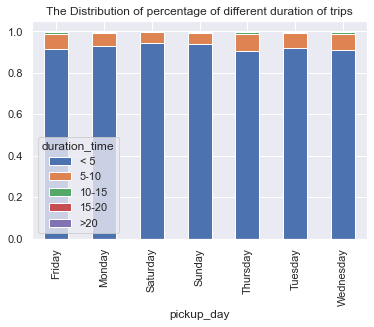

In [43]:
ax1=df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

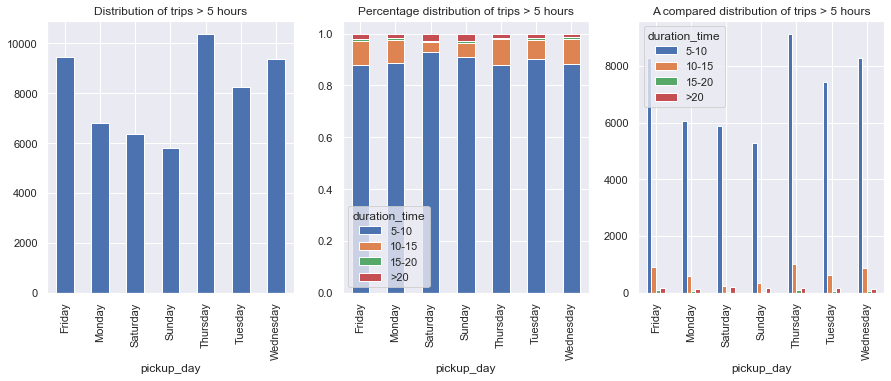

In [44]:
#3 graphs present 3 types of information here:
#The left most graph shows a frequency distribution of the number of trips(> 5 hours ) taken on each day of the week
#The middle one shows a percentage distribution of the trips of different duration ( > 5 hours )within each day of the week.
#The right one shows the frequency distribution of the trips of different duration (> 5 hours)within each day of the week.

figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')
ax2=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')
ax3=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
E:\Anaconda3\envs\ml_3.6\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


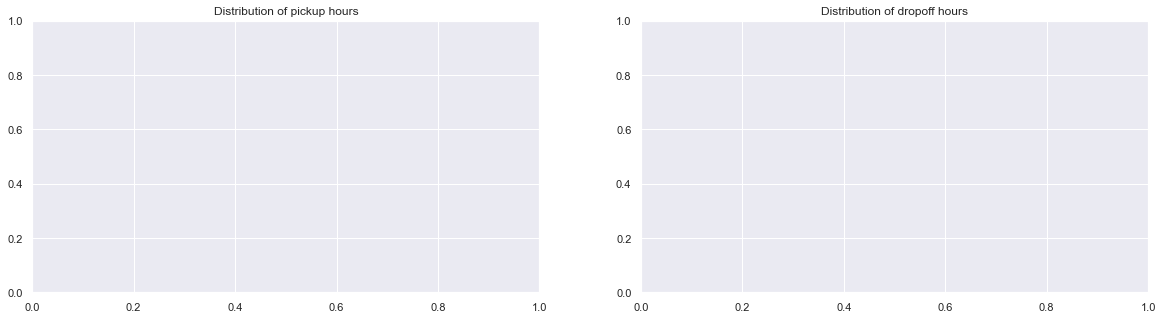

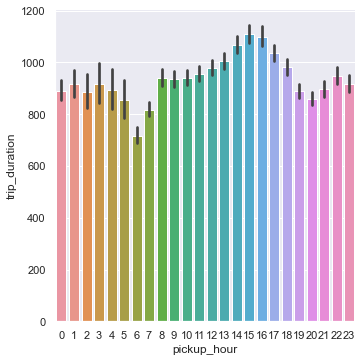

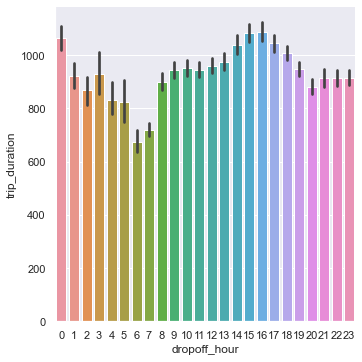

In [45]:
#relationship between Trip Duration and The time of the day
figure,(ax1,ax2)=plt.subplots(nrows = 1, ncols=2,figsize=(20,5))
ax1.set_title('Distribution of pickup hours')
ax=sns.catplot(x="pickup_hour",
y="trip_duration",kind="bar",data=df,ax=ax1)
ax2.set_title('Distribution of dropoff hours')
ax=sns.catplot(x="dropoff_hour",
y="trip_duration",kind="bar",data=df,ax=ax2)
plt.show()

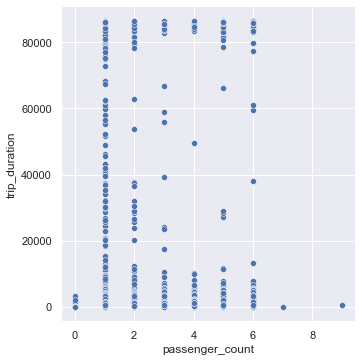

In [46]:
#The relationship between passenger count and duration

sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")


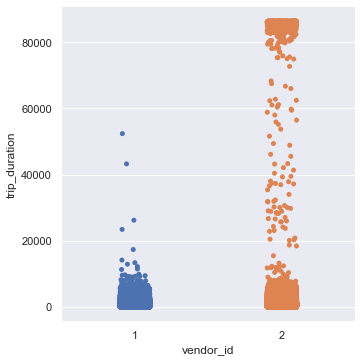

In [47]:
#The relationship between vendor id and duration

sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

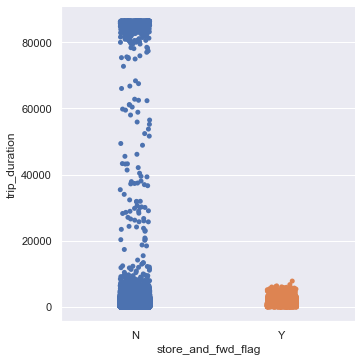

In [48]:
#relationship between store forward flag and duration

sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

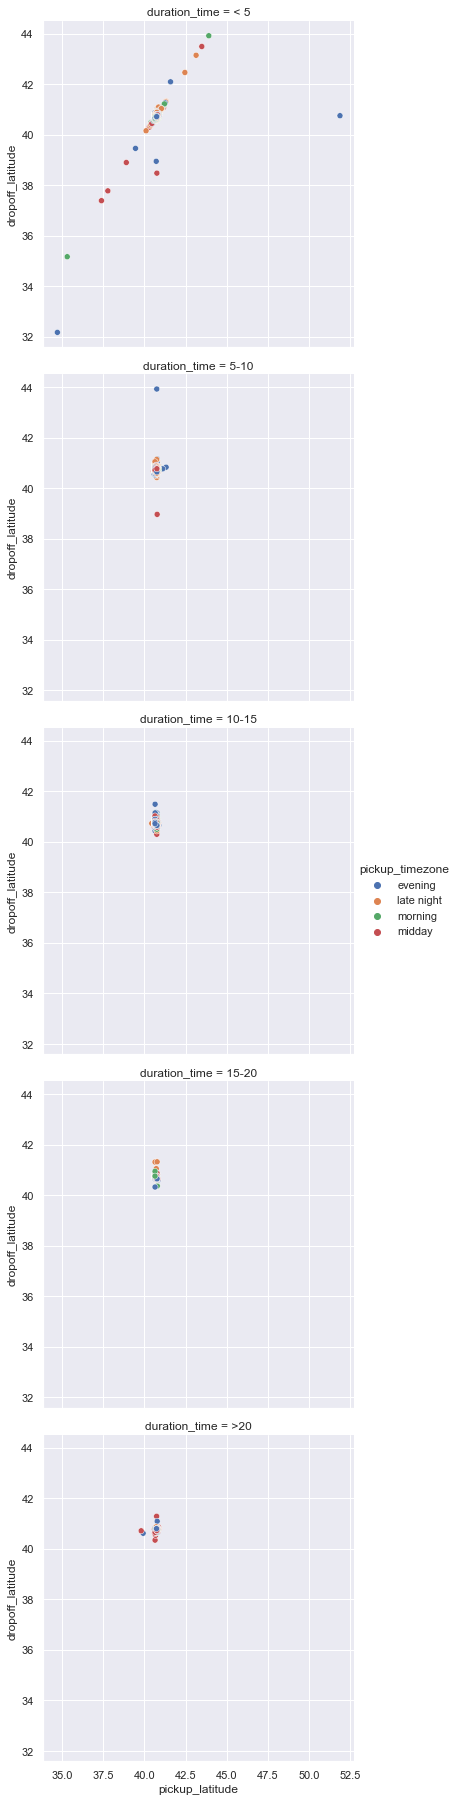

In [49]:
#relationship between geographical location and duration
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=df);

In [ ]:
# Conclusion about Trip Duration and the data set:

# Trip Duration varies a lot ranging from few seconds to more than 20 hours
# Most frequent trips are taken on Friday , Saturday and Thursday

# Average duration of a trip is most on Thursday and Friday as trips longer than 5 hours are mostly taken in these days

# The highest average time taken to complete a trip are for trips started in midday(between 14 and 17 hours) and 
# the least are the ones taken in the early morning(between 6–7 hours)
   
# vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips

# flag was stored only for short duration trips and for long duration trips the flag was never stored.
    
# Long duration trips(> 5 hours) are mostly concentrated with their pickup region near (40 °,75 °) to (42°,75°)